### Problem 4: Van der Pol oscillator with stochastic noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sigma = 0.0
mu = 0.001

#Function to Integrate v
def Integ_v(x,v, dt):
    return v - mu*(x*x-1)*v*dt - x*dt - sigma*np.random.normal(loc=0.0, scale=np.sqrt(dt))

#Function to Integrate x 
def Integ_x(x,v, dt):
    return x + v*dt

In [3]:
#Function to Integrate v and x 
def VDP_Noise(t_list, x0, v0, dt):
    x_list = np.zeros((len(t_list), 1)) # Initialize List to save x 
    v_list = np.zeros((len(t_list), 1)) # Initialize List to save v
    
    x = x0 #Set the Initial Value for x
    v = v0 #Set the Initial Value for x
    
    for i, t in enumerate(t_list):

        v = Integ_v(x,v, dt)
        x = Integ_x(x,v, dt)
            
        x_list[i] = x
        v_list[i] = v

    return x_list,v_list

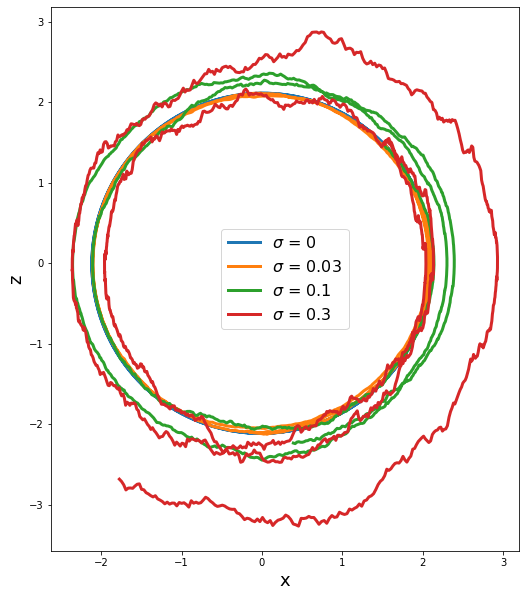

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

# Parameters:
x0 = 1.5 #Initial Value for x
v0 = 1.5 #Initial Value for v

mu = 0.001 #\mu in VDP equation
sigmas = [0,0.03, 0.1, 0.3] #noise strength
total_time = 15 #Total time of trajectories
dt = 1e-2 #time discretization
Num_Step = int(total_time/dt) #Number of Steps
t = np.linspace(0,total_time,Num_Step)


#Change noise strength and plot
for sigma in sigmas:

    sigma = sigma
    x,v = VDP_Noise(t, x0, v0,dt)
    plt.plot(x,v, linewidth=3, label='$\sigma$ = '+str(sigma))
    
    
    
ax.set_aspect(1)
plt.legend(fontsize = 16)
plt.xlabel('x', fontsize = 18)
plt.ylabel('z', fontsize = 18)
plt.show()